# Project Background




- Famous Retail Store called Corporation Favorita aims to optimize inventory management using ML techniques to analyze product demand trends.



- By applying Regression analysis on historical sales data, the company aims to identify patterns and insights for accurate demand forecasting.



- The goal is to optimize inventory levels and ensure timely availability of products to meet customer demand.

# Import Libraries

In [1]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd
from datetime import datetime


# Statistical Modeling and Mathematics
import statsmodels.api as sm  
from math import sqrt
import scipy.stats as stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# Data Encoding and Preprocessing
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder

# Modeling and Machine Learning
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Metrics and Evaluation
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

# Optimization
from sklearn.model_selection import GridSearchCV

# Other
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Read the data from separate CSV files

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
stores = pd.read_csv("stores.csv")
oil = pd.read_csv("oil.csv")
holidays = pd.read_csv("holidays_events.csv")
transactions = pd.read_csv("transactions.csv")
sample = pd.read_csv("sample_submission.csv")

# Understanding the data

## Train

In [3]:
print(train.shape)
train.head(2)

(3000888, 6)


id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0

In [4]:
# Checking the basic info of the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


- The date column is recorded as object. It has to be converted to date format

In [5]:
# Checking for missing data in the train dataset
train.duplicated().any()

False

## Test

In [6]:
print(test.shape)
test.head(2)

(28512, 5)


id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0

In [7]:
# Checking the basic info of the test data

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [8]:
# Checking for duplicates in the test data

test.duplicated().any()

False

In [9]:
# Checking for unique values in the test data
test.nunique()

id             28512
date              16
store_nbr         54
family            33
onpromotion      212
dtype: int64

## Stores

In [10]:
print(stores.shape)
stores.head(2)

(54, 5)


store_nbr   city      state type  cluster
0          1  Quito  Pichincha    D       13
1          2  Quito  Pichincha    D       13

In [11]:
# Checking the shape of the stores data
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [12]:
# Checking for dupliated entries in the stores data
stores.duplicated().any()

False

In [13]:
# Checking for unique values in the stores data
stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

- Stores are located at 22 different Cities in 16 States. There are 5 different types of stores.There are 17 similar stores located in these cities.

### Holidays

In [14]:
print(holidays.shape)
holidays.head(2)

(350, 6)


date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   

   transferred  
0        False  
1        False

In [15]:
# Checking the basic info of the holidays data

holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [16]:
# Checking for duplicated values in the data
holidays.duplicated().any()

False

In [17]:
# Checking the number of unique values in the holidays dataset

holidays.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [18]:
# Checking the different types of holidays

list(holidays.type.unique())

['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event']

### Oil

In [19]:
print(oil.shape)
oil.head(2)

(1218, 2)


date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14

In [20]:
# Checking the basic info of the oil data
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [21]:
# Checking the null values

oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

- There are 43 null values in the oil data. Since this a crude oil price,we need to impute through interpolation.

In [22]:
# Cecking for duplicated values in the oil data

oil.duplicated().any()

False

## Transactions

In [23]:
print(transactions.shape)
transactions.head(2)

(83488, 3)


date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111

In [24]:
# Checking the basic info of the transactions data

transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [25]:
# Checking for duplicated values in the transactions data

transactions.duplicated().any()

False

# EDA; Univariate Analysis

### Sales, Target value

#### What is the trend of sales overtime?

Text(0, 0.5, 'Sales')

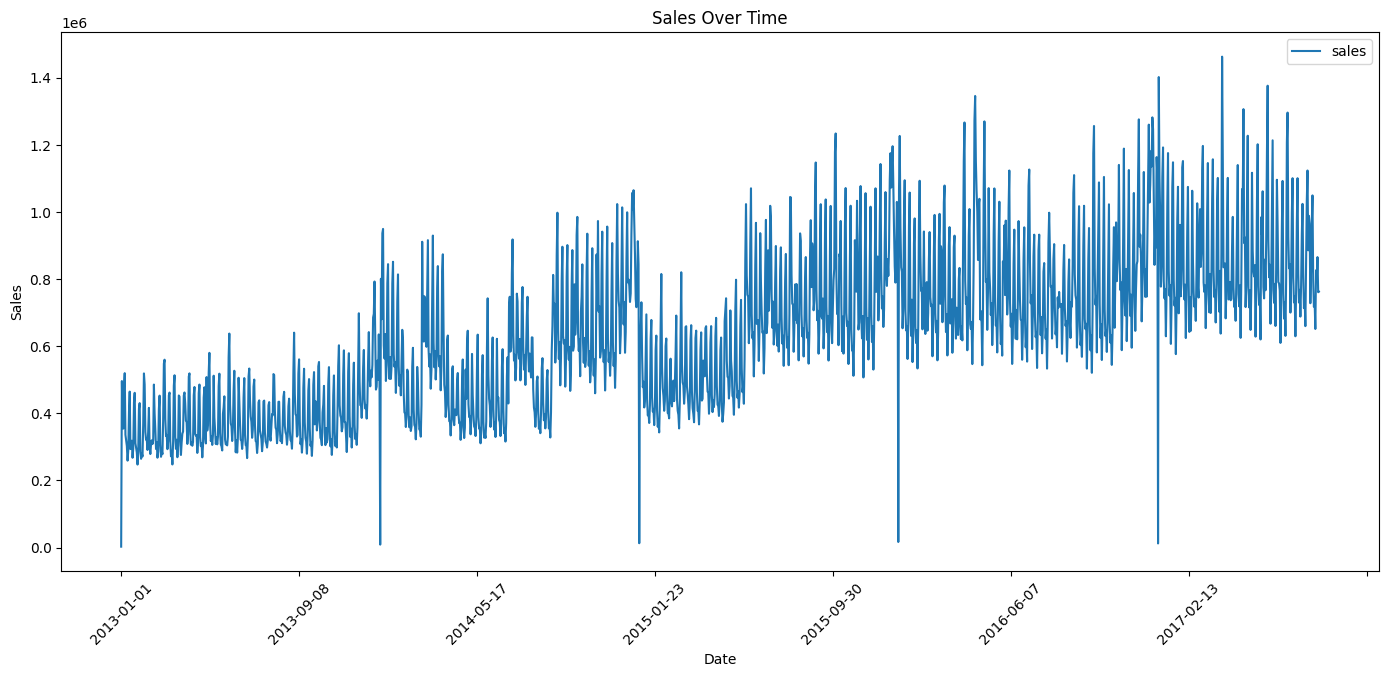

In [26]:
sales_over_time = train.groupby("date").sales.sum().reset_index()
sales_over_time = sales_over_time.set_index("date")
sales_over_time.plot(figsize=(17, 7))

plt.title("Sales Over Time")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.style.use("bmh")
plt.ylabel("Sales")

**Observation**

- The plot shows a consistent upward trend in sales over time. This indicates that the business has been experiencing growth in its sales performance.


- The plot shows us clearly that there are spikes near the end of the year(starting November), thus indicating a rise in sales

### Oil Price Distribution

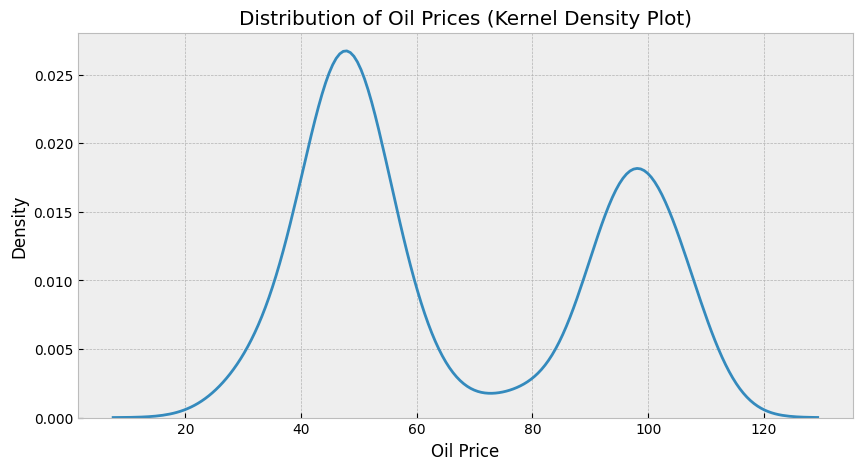

In [27]:
# oil price distribution (kernel density)
plt.figure(figsize=(10, 5))
sns.kdeplot(data=oil, x="dcoilwtico")
plt.xlabel('Oil Price')
plt.title('Distribution of Oil Prices (Kernel Density Plot)')
plt.show()

**Observation**

- The oil price exhibits two distinct clusters: one with prices below 70 and another with prices above 70.


- A significant concentration of oil prices within the range of $40 to  $60 indicates a high distribution of prices in this range.


- The pattern suggests that when the daily oil price is below around 70, there are generally more sales in the data.


- Therefore, customers are more inclined to purchase when oil prices are lower.

### Oil Changes Over Years

In [28]:
fig = go.Figure(data=go.Scatter(x=oil['date'], y=oil['dcoilwtico'], line=dict(color='green')))
fig.update_layout(title='Changes in Oil Prices over Time', xaxis_title='Date', yaxis_title='Oil Prices')
fig.show()

**Observation**

- This data contains some missing value which need to be imputed in later section.


- Generally, the oil data shows a **decreasing** trend in the prices over the time. 


- We need to check the correlation with other factor like sales

### Stores

In [29]:
stores.sample(5,random_state=0)

store_nbr       city      state type  cluster
53         54  El Carmen     Manabi    C        3
33         34  Guayaquil     Guayas    B        6
48         49      Quito  Pichincha    A       11
26         27      Daule     Guayas    D        1
11         12  Latacunga   Cotopaxi    C       15

In [30]:
stores = pd.read_csv("stores.csv")

Text(0.5, 0, 'Number of Store Types')

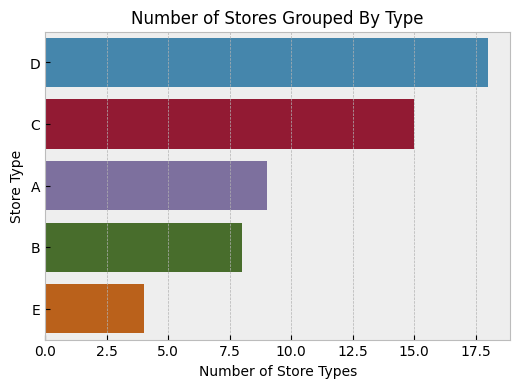

In [31]:
# Visualization of Store Type
plt.figure(figsize=(6, 4))
sns.countplot(data=stores, y='type',
              order=stores.type.value_counts().index,)
plt.title('Number of Stores Grouped By Type',fontsize=12)
plt.ylabel('Store Type',fontsize=10)
plt.xlabel('Number of Store Types',fontsize=10)

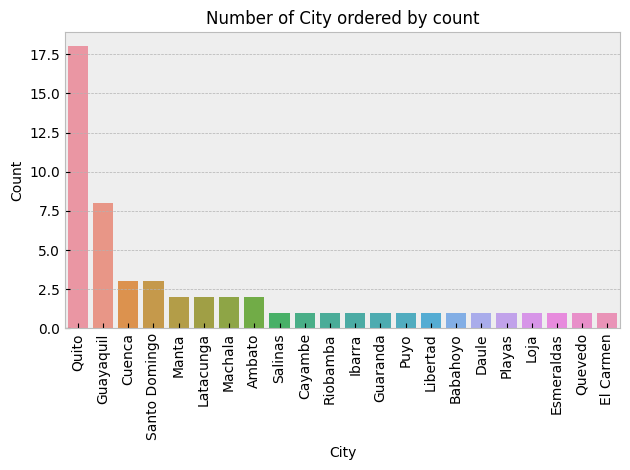

In [32]:
stores = pd.read_csv("stores.csv")

# Calculate the count of stores for each city and sort by count
city_counts = stores['city'].value_counts().sort_values(ascending=False)
city_order = city_counts.index

# Create the countplot with ordered cities
ax = sns.countplot(data=stores, x='city', order=city_order)
ax.set_title('Number of City ordered by count', fontsize=12)
ax.set_ylabel('Count',fontsize=10)
ax.set_xlabel('City',fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis tick labels


plt.tight_layout()
plt.show()

Text(0.5, 0, 'Count')

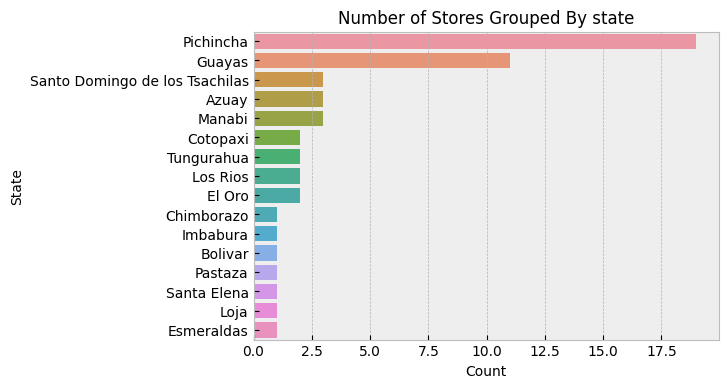

In [33]:
# Visualization of Store Type
plt.figure(figsize=(6, 4))
sns.countplot(data=stores, y='state', 
              order=stores.state.value_counts().index)
plt.title('Number of Stores Grouped By state',fontsize=12)
plt.ylabel('State',fontsize=10)
plt.xlabel('Count',fontsize=10)

#### Total Sale by Stores

Text(0, 0.5, 'Store Number')

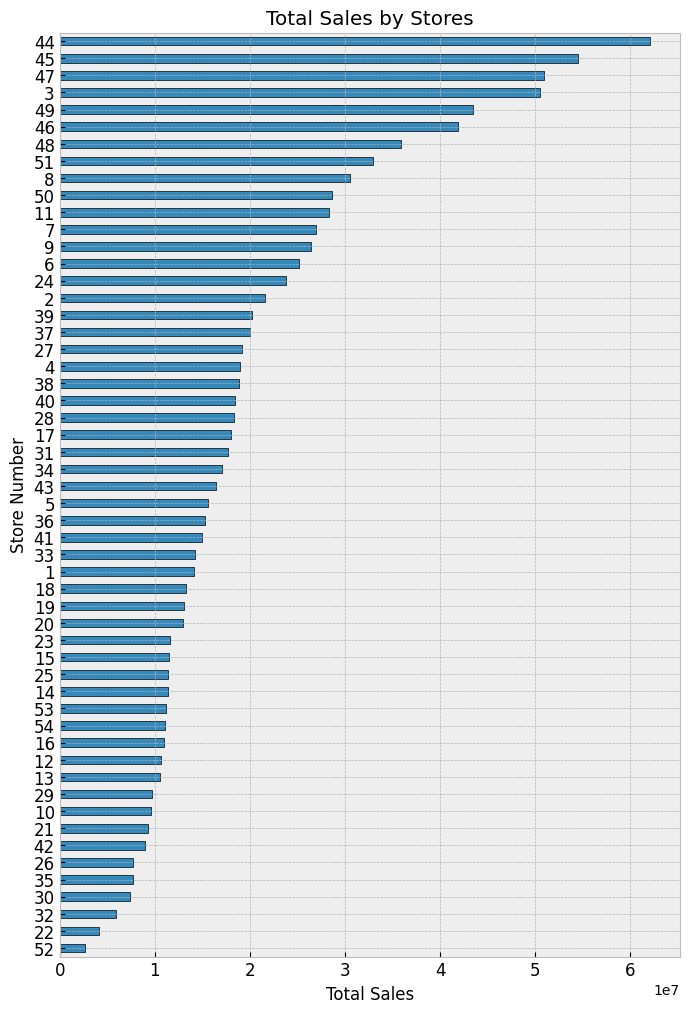

In [34]:
fig, ax = plt.subplots(figsize=(8, 12))

train.groupby("store_nbr")["sales"].sum().sort_values().\
    plot(kind="barh", ax=ax, edgecolor="k", title="Total Sales by Stores",fontsize=12)

ax.set_xlabel("Total Sales")
ax.set_ylabel("Store Number")

**Observation**

- According to the chart, Stores Category **D** has the highest number of store chains, with Stores Category C coming next in line. On the other hand, Stores Category E has the fewest number of store chains.


- According to the graph, **Quito and Pichincha** have the highest count.


- Store number **44 has the highest** sale, and store number **52 has the lowest** sale.


### Total Sales by family(Each product type)

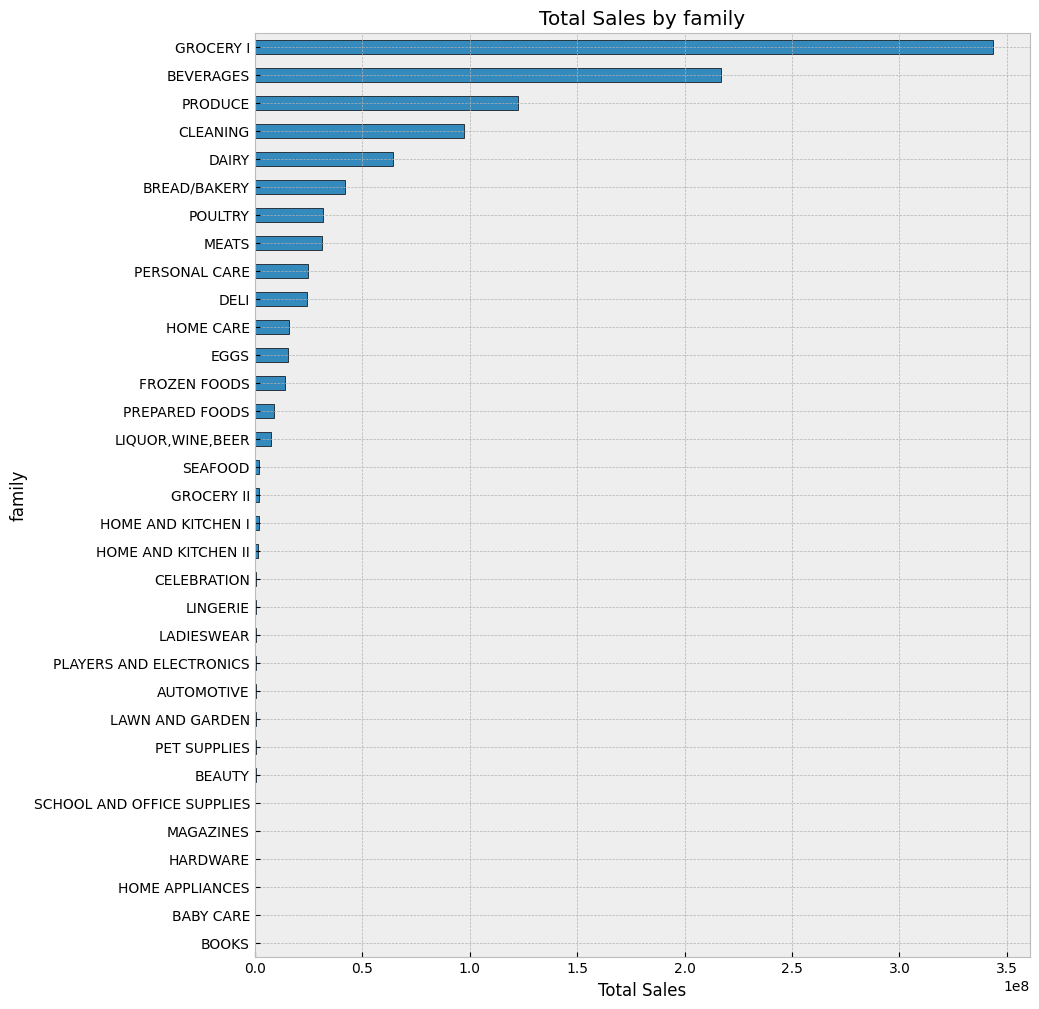

In [35]:
fig, ax = plt.subplots(figsize=(10, 12))

train.groupby("family")["sales"].sum().sort_values().\
    plot(kind="barh", ax=ax, edgecolor="k", title="Total Sales by family")

ax.set_xlabel("Total Sales")
ax.set_ylabel("family");

**Observation**

- Grocery and Beverages have the highest sales in comparison with other products

### Holidays

In [36]:
holidays.sample(7,random_state=0)

date        type    locale locale_name                description  \
6    2012-06-23     Holiday     Local    Guaranda  Cantonizacion de Guaranda   
52   2013-05-01     Holiday  National     Ecuador            Dia del Trabajo   
270  2016-08-15     Holiday     Local    Riobamba      Fundacion de Riobamba   
45   2013-02-12     Holiday  National     Ecuador                   Carnaval   
296  2016-12-31  Additional  National     Ecuador       Primer dia del ano-1   
189  2015-10-07     Holiday     Local     Quevedo   Cantonizacion de Quevedo   
191  2015-11-02     Holiday  National     Ecuador            Dia de Difuntos   

     transferred  
6          False  
52         False  
270        False  
45         False  
296        False  
189        False  
191        False

- transferred = Normal day

- Transfer = Actual holiday

In [37]:
set(holidays.transferred)

{False, True}

In [38]:
set(holidays.type)

{'Additional', 'Bridge', 'Event', 'Holiday', 'Transfer', 'Work Day'}

In [39]:
set(holidays.locale)

{'Local', 'National', 'Regional'}

In [40]:
# Checking "Holidays" that were celebrated on "actual days" and not transferred

holidays[(holidays.type == "Holiday") & (holidays.transferred == False)]

date     type    locale locale_name                    description  \
0    2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1    2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2    2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3    2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4    2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   
..          ...      ...       ...         ...                            ...   
337  2017-11-11  Holiday     Local   Latacunga     Independencia de Latacunga   
338  2017-11-12  Holiday     Local      Ambato        Independencia de Ambato   
341  2017-12-08  Holiday     Local        Loja              Fundacion de Loja   
344  2017-12-22  Holiday     Local     Salinas       Cantonizacion de Salinas   
348  2017-12-25  Holiday  National     Ecuador                        Navidad   

     transferred  
0          False  
1          False  
2          False  
3          False  
4          False  
..           ...  
337        False  
338        False  
341        False  
344        False  
348        False  

[209 rows x 6 columns]

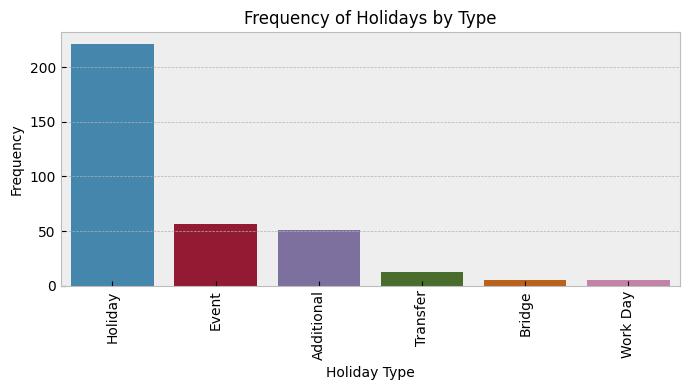

In [41]:
plt.figure(figsize=(7, 4))

# Create the countplot
sns.countplot(data=holidays, x='type', order=holidays['type'].value_counts().index)
plt.title('Frequency of Holidays by Type', fontsize=12)
plt.xlabel('Holiday Type', fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=10)


plt.tight_layout()
plt.show()

- Theses holidays were not transferred but were celebrated on their actual days

# Bivariate Analysis

- Checking for the relationship between oil price and sales

In [42]:
sales = train.groupby("date").sales.sum()

In [43]:
oil_sales = pd.merge(sales, oil, on="date", how="left")
oil_sales = oil_sales.rename(columns={"dcoilwtico" : "oil_price"})
oil_sales = oil_sales.set_index("date").dropna()
oil_sales.head()

sales  oil_price
date                                
2013-01-02  496092.417944      93.14
2013-01-03  361461.231124      92.97
2013-01-04  354459.677093      93.12
2013-01-07  336122.801066      93.20
2013-01-08  318347.777981      93.21

### Does oil prices affect sales?

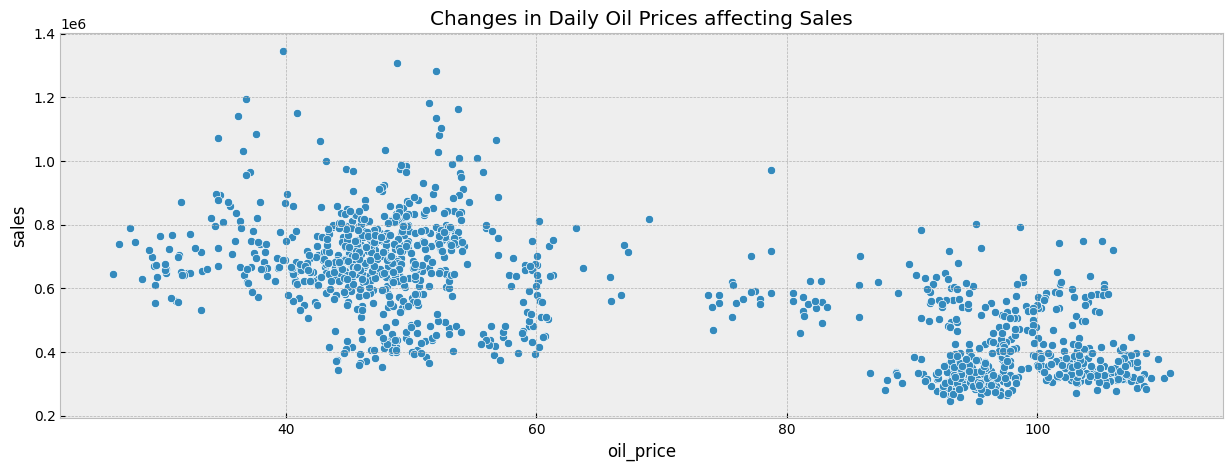

In [44]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=oil_sales, x="oil_price", y="sales", palette="Blues_r", legend=False)
plt.title("Changes in Daily Oil Prices affecting Sales")
plt.show()

- From the scatter plot, sales are directly affected by oil prices. As oil prices increase, sales reduce.**negative correlation**



- The pattern suggests that when the daily oil price is below around 70, there are generally more sales in the data.



- in other words, there are two clusters based on the oil price: one cluster with oil prices below 70 and another cluster with oil prices above 70.



- Therefore, customers are more inclined to make purchases when oil prices are lower.

## Transactions and oil


In [45]:
oil_trasactions = pd.merge(transactions, oil, on="date", how="inner").dropna()
oil_trasactions = oil_trasactions.rename(columns={"dcoilwtico" : "oil_price"})
oil_trasactions.head()

date  store_nbr  transactions  oil_price
1  2013-01-02          1          2111      93.14
2  2013-01-02          2          2358      93.14
3  2013-01-02          3          3487      93.14
4  2013-01-02          4          1922      93.14
5  2013-01-02          5          1903      93.14

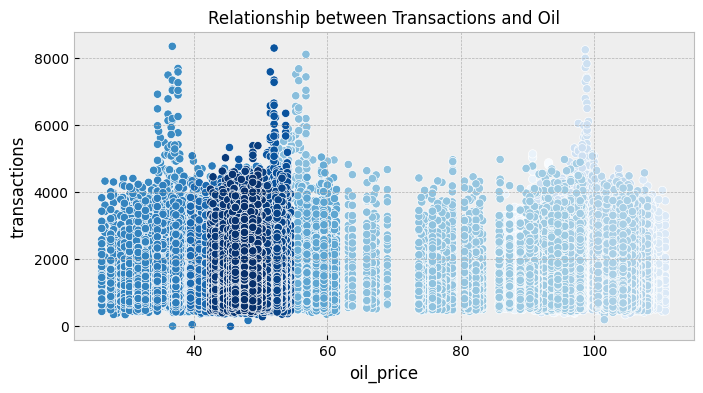

In [46]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data= oil_trasactions, x='oil_price', y='transactions', hue='date', palette='Blues', legend=False)
plt.title("Relationship between Transactions and Oil", fontsize=12)
#plt.ylim(5, 8359)  # Set the y-axis limits
plt.show()

**Observation**

- Correlation between oil and transactions is not constant. Fluctuations in oil prices do not always result in changes in store transactions. However, there are certain exceptional values that could be influenced by other factors, such as holiday seasons.


- A significant concentration of oil price within a range of 40 to 60, indicate a high distribution of price in this range.

### Which dates have the lowest and highest sales for each year?

(array([2012.5, 2013. , 2013.5, 2014. , 2014.5, 2015. , 2015.5, 2016. ,
        2016.5, 2017. , 2017.5]),
 [Text(2012.5, 0, '2012.5'),
  Text(2013.0, 0, '2013.0'),
  Text(2013.5, 0, '2013.5'),
  Text(2014.0, 0, '2014.0'),
  Text(2014.5, 0, '2014.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2015.5, 0, '2015.5'),
  Text(2016.0, 0, '2016.0'),
  Text(2016.5, 0, '2016.5'),
  Text(2017.0, 0, '2017.0'),
  Text(2017.5, 0, '2017.5')])

<Figure size 1500x500 with 0 Axes>

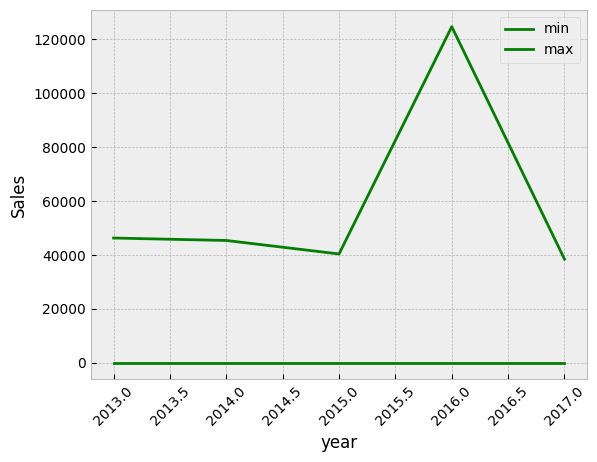

In [47]:
plt.figure(figsize=[15,5])

train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year

grouped_by_year = train.groupby('year')['sales'].agg(['min','max'])
grouped_by_year.plot(kind='line',color='green')

plt.ylabel('Sales')
plt.xticks(rotation=45)

**Observation:**

- The plot reveals the overall trend in sales. which mostly was stable over the years and has increased in 2016. 



- The vertical distance between the minimum and maximum lines for each year represents the sales variability within that year. A wider gap indicates greater variability in sales.


### Made the earthquake impact sales? (April 16, 2016)

In [48]:
#converting to same datatype
train['date'] = pd.to_datetime(train['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

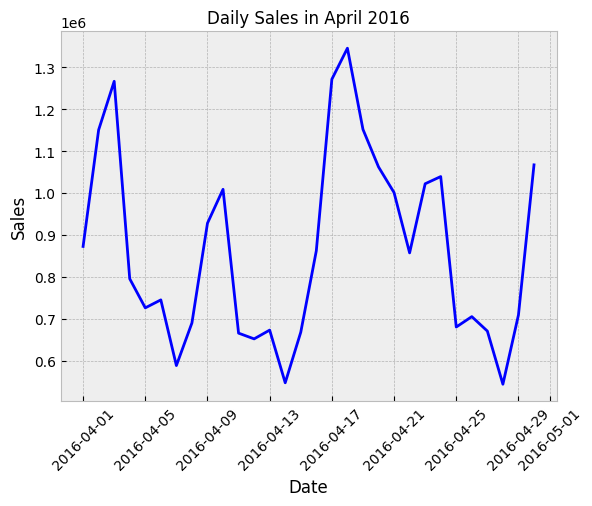

In [49]:
sales_df = pd.merge(train, transactions, on=['date', 'store_nbr'])
april_sales = sales_df[(sales_df['date'] >= '2016-04-01') & (sales_df['date'] <= '2016-04-30')]
daily_sales = april_sales.groupby('date')['sales'].sum()
plt.plot(daily_sales.index, daily_sales.values, color="b")

plt.title('Daily Sales in April 2016',fontsize=12)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

- The sales data indicates that the earthquake had no apparent effect on sales. The graph illustrates a consistent upward trend in sales from April 14th, 2016 to April 18th, 2016. Despite the occurrence of the earthquake on April 16th, 2016, sales maintained their positive momentum and continued to rise.

### How did the earthquake affect sales for the next 8 weeks after it happened?

In [50]:
before_earthquake = train[train['date'] < pd.to_datetime('2016-04-16')]  
after_earthquake = train[(train['date'] >= pd.to_datetime('2016-04-16')) & (train['date'] < pd.to_datetime('2016-06-16'))]

In [51]:
average_sales_before = before_earthquake['sales'].mean()
average_sales_after = after_earthquake['sales'].mean()

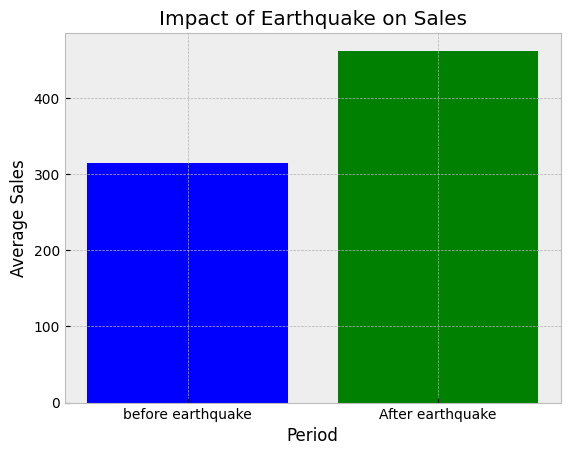

In [52]:
colors = ['blue', 'green']

# Plot the bar chart
plt.bar(['before earthquake', 'After earthquake'], [average_sales_before, average_sales_after], color=colors)

plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Impact of Earthquake on Sales')

plt.show()

**Interpretation**

- Positive impact: The increase in average sales implies that the earthquake had a positive effect on sales. It indicates that the earthquake may have influenced consumer behavior, leading to higher sales figures.



- Increased demand: The higher average sales after the earthquake suggest an increased demand for the products or services offered. This could be due to various factors such as changes in consumer needs, urgency to purchase, or disruptions in the market.



- Opportunities for growth: The rise in sales presents opportunities for the business to capitalize on the post-earthquake market conditions. It provides a chance to drive further growth and develop strategies to maintain or surpass the increased sales levels.



- Market dynamics: The earthquake may have caused shifts in market dynamics, such as changes in consumer preferences or intensified competition. Understanding these dynamics is crucial for adapting to the new market conditions and making informed business decisions.

### Are certain groups of stores selling more products? (Cluster, city, state, type)

In [53]:
stores = pd.read_csv("stores.csv")

In [54]:
merged_train_store = pd.merge(train, stores, on="store_nbr")
grouped_sales = merged_train_store.groupby(["city", "state", "type"])["sales"].sum().reset_index()
sales_by_city_type = grouped_sales.pivot(index="city", columns="type", values="sales")

fig = go.Figure()

for column in sales_by_city_type.columns:
    fig.add_trace(go.Bar(x=sales_by_city_type.index,y=sales_by_city_type[column],name=column))

fig.update_layout(
    title="Total Sales by City and Store Type",xaxis_title="City",yaxis_title="Total Sales",barmode="stack",
    legend_title="Store Type", height=600, width=800)

fig.show()

- **Quito** has the highest total sales compared to others. This indicates varying levels of consumer demand and market potential across cities.



- The distribution of sales among different store types differs across cities. Some cities have a higher concentration of one store type, while others may have a more balanced distribution. e.g., **Store Type A** tends to sell more products. Their sales were denser in Quito.



- We can identify the **store type(C)** that has the most contribution to the total sales in each city. This helps understand the market dynamics and consumer preferences specific to each city.


### What is the relationship between product and sales?

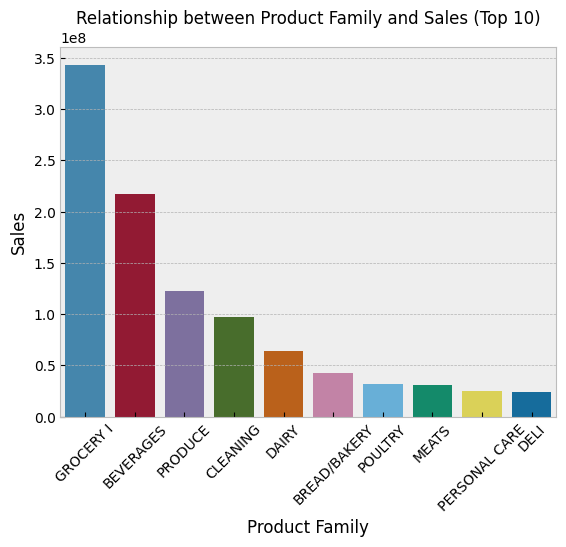

In [55]:
# Group data by product family and sum the sales
family_sale = train.groupby('family').sum()['sales']

# Sort the data by sales
family_sale = family_sale.sort_values(ascending=False)

# Plot the top 10 product families
sns.barplot(x=family_sale.index[:10], y=family_sale.values[:10])

# Add labels and title
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.title('Relationship between Product Family and Sales (Top 10)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


- Sales are less affected by promotion


- From the scatter plot, it can be observed that there is a variation in the impact of promotions on sales. Specifically, in stores where the promotion value is 0 (indicating no promotion), the sales tend to be higher compared to stores where certain products had promotions.


- This suggests that promotions may have a limited effect on sales in some cases, and other factors may play a more significant role in driving sales.

# Convert date column to datetime format in a dataframe

In [56]:
def convert_date_to_datetime(df):
    df['date'] = pd.to_datetime(df['date'])

# List of dataframes to convert date column to datetime format
dataframes = [train,transactions,holidays,oil,test]

# Convert date column to datetime format in each dataframe
for df in dataframes:
    convert_date_to_datetime(df)

# Merging All the Files

In [57]:
# Merge datasets on common columns

merged_data1 = pd.merge(train, transactions, on=['date','store_nbr'])
merged_data2 = pd.merge(merged_data1,holidays, on='date')
merged_data3 = pd.merge(merged_data2,oil, on='date')
merged_data_final = pd.merge(merged_data3,stores, on='store_nbr')


# Preview the merged data
merged_data_final.head()

id       date  store_nbr      family  sales  onpromotion  year  \
0  561 2013-01-01         25  AUTOMOTIVE    0.0            0  2013   
1  562 2013-01-01         25   BABY CARE    0.0            0  2013   
2  563 2013-01-01         25      BEAUTY    2.0            0  2013   
3  564 2013-01-01         25   BEVERAGES  810.0            0  2013   
4  565 2013-01-01         25       BOOKS    0.0            0  2013   

   transactions   type_x    locale locale_name         description  \
0           770  Holiday  National     Ecuador  Primer dia del ano   
1           770  Holiday  National     Ecuador  Primer dia del ano   
2           770  Holiday  National     Ecuador  Primer dia del ano   
3           770  Holiday  National     Ecuador  Primer dia del ano   
4           770  Holiday  National     Ecuador  Primer dia del ano   

   transferred  dcoilwtico     city        state type_y  cluster  
0        False         NaN  Salinas  Santa Elena      D        1  
1        False         NaN  Salinas  Santa Elena      D        1  
2        False         NaN  Salinas  Santa Elena      D        1  
3        False         NaN  Salinas  Santa Elena      D        1  
4        False         NaN  Salinas  Santa Elena      D        1

In [58]:
# Rename columns using the rename method
merged_data = merged_data_final.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

In [59]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   year          322047 non-null  int64         
 7   transactions  322047 non-null  int64         
 8   holiday_type  322047 non-null  object        
 9   locale        322047 non-null  object        
 10  locale_name   322047 non-null  object        
 11  description   322047 non-null  object        
 12  transferred   322047 non-null  bool          
 13  dcoilwtico    300003 non-null  float64       
 14  city          322047 non-null  object        
 15  state         322

In [60]:
# Inspect data for null values
merged_data.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
year                0
transactions        0
holiday_type        0
locale              0
locale_name         0
description         0
transferred         0
dcoilwtico      22044
city                0
state               0
store_type          0
cluster             0
dtype: int64

In [61]:
# Finding duplicated valuew
merged_data.duplicated().sum()  

0

# Pre- processing

## Impute Missing Values for oil Using Interpolation

In [62]:
# Resample oil data by day and sum the values
oil = oil.set_index("date").dcoilwtico.resample("D").sum().reset_index()


# Interpolate missing values
merged_data["dcoilwtico"] = np.where(merged_data["dcoilwtico"] == 0, np.nan, merged_data["dcoilwtico"])
merged_data["dcoilwtico"] = oil.dcoilwtico.interpolate(method="bfill")

# Assign interpolated oil values to merged_data
merged_data["dcoilwtico"] = merged_data["date"].map(oil.set_index("date")["dcoilwtico"])

In [63]:
print(merged_data.dcoilwtico.isnull().sum())

0


In [64]:
merged_data.isnull().sum().any()

False

In [65]:
# Convert dataset to CSV 
merged_data.to_csv('merged_data.csv', index=False)

## Feature Engineering; Extract Feature

In [66]:
# Change date datatype to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Create new features
merged_data['year'] = merged_data['date'].dt.year
merged_data['month'] = merged_data['date'].dt.month
merged_data['dayofmonth'] = merged_data['date'].dt.day
merged_data['dayofweek'] = merged_data['date'].dt.dayofweek
merged_data['dayname'] = merged_data['date'].dt.strftime('%A')

In [67]:
merged_data.head(2)

id       date  store_nbr      family  sales  onpromotion  year  \
0  561 2013-01-01         25  AUTOMOTIVE    0.0            0  2013   
1  562 2013-01-01         25   BABY CARE    0.0            0  2013   

   transactions holiday_type    locale  ... transferred dcoilwtico     city  \
0           770      Holiday  National  ...       False        0.0  Salinas   
1           770      Holiday  National  ...       False        0.0  Salinas   

         state store_type cluster month  dayofmonth  dayofweek  dayname  
0  Santa Elena          D       1     1           1          1  Tuesday  
1  Santa Elena          D       1     1           1          1  Tuesday  

[2 rows x 22 columns]

In [68]:
# Write the DataFrame to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

In [69]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   year          322047 non-null  int64         
 7   transactions  322047 non-null  int64         
 8   holiday_type  322047 non-null  object        
 9   locale        322047 non-null  object        
 10  locale_name   322047 non-null  object        
 11  description   322047 non-null  object        
 12  transferred   322047 non-null  bool          
 13  dcoilwtico    322047 non-null  float64       
 14  city          322047 non-null  object        
 15  state         322

# Moving Average on Daily Totale Sales

(15694.0, 17414.0)

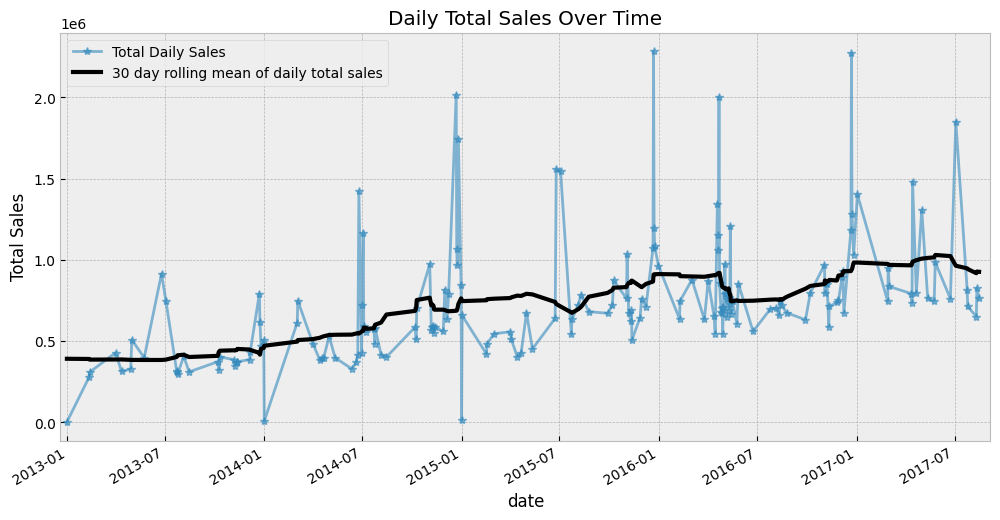

In [70]:
total_daily_sales = merged_data.groupby("date")["sales"].sum()

ax = total_daily_sales.plot(y="sales",figsize=(12, 6),marker="*",alpha=0.6,legend=None) # ,mec='k'

total_daily_sales.rolling(window=30, min_periods=7, center=True).mean().\
    plot(ax=ax, lw=3, color="k", legend=None)

plt.legend(
    labels=["Total Daily Sales", "30 day rolling mean of daily total sales"])

plt.title("Daily Total Sales Over Time")
plt.ylabel("Total Sales")
plt.xlim("2012-12-20", "2017-09-05")

- Smoothing Out Noise: Time series data often contains noise or short-term fluctuations that can obscure the underlying trend. The rolling average smooths out these fluctuations, making it easier to observe the overall pattern or trend without being influenced by temporary variations.


- Seasonality : we can detect seasonal or cyclic patterns in the data. It helps identify recurring patterns that repeat over a certain time interval, such as weekly, monthly, or yearly patterns.

## Drop unnecessary columns

In [71]:
merged_data.drop(columns=['id','locale', 'locale_name', 'description', 'transferred','state','store_type','dayname']
                 ,axis=1, inplace=True)

In [72]:
# set the date column as the index
merged_data.set_index('date', inplace=True)

In [73]:
merged_data.sample(3,random_state=0)

store_nbr               family    sales  onpromotion  year  \
date                                                                     
2016-05-12         20         PET SUPPLIES    1.000            0  2016   
2016-04-27         46         FROZEN FOODS  203.789            5  2016   
2016-06-23         26  HOME AND KITCHEN II    0.000            0  2016   

            transactions holiday_type  dcoilwtico       city  cluster  month  \
date                                                                           
2016-05-12          1399        Event       46.64      Quito        6      5   
2016-04-27          2783        Event       45.29      Quito       14      4   
2016-06-23           451      Holiday       49.34  Guayaquil       10      6   

            dayofmonth  dayofweek  
date                               
2016-05-12          12          3  
2016-04-27          27          2  
2016-06-23          23          3

In [74]:
merged_data.shape    

(322047, 13)

In [75]:
# Write the DataFrame to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

In [76]:
merged_data.head(2)

store_nbr      family  sales  onpromotion  year  transactions  \
date                                                                        
2013-01-01         25  AUTOMOTIVE    0.0            0  2013           770   
2013-01-01         25   BABY CARE    0.0            0  2013           770   

           holiday_type  dcoilwtico     city  cluster  month  dayofmonth  \
date                                                                       
2013-01-01      Holiday         0.0  Salinas        1      1           1   
2013-01-01      Holiday         0.0  Salinas        1      1           1   

            dayofweek  
date                   
2013-01-01          1  
2013-01-01          1

## Encoding

In [77]:
# Select the categorical columns
categorical_columns = ["family", "city", "holiday_type"]
categorical_data = merged_data[categorical_columns]
categorical_data

family     city holiday_type
date                                                        
2013-01-01                  AUTOMOTIVE  Salinas      Holiday
2013-01-01                   BABY CARE  Salinas      Holiday
2013-01-01                      BEAUTY  Salinas      Holiday
2013-01-01                   BEVERAGES  Salinas      Holiday
2013-01-01                       BOOKS  Salinas      Holiday
...                                ...      ...          ...
2017-08-15                     POULTRY    Manta      Holiday
2017-08-15              PREPARED FOODS    Manta      Holiday
2017-08-15                     PRODUCE    Manta      Holiday
2017-08-15  SCHOOL AND OFFICE SUPPLIES    Manta      Holiday
2017-08-15                     SEAFOOD    Manta      Holiday

[322047 rows x 3 columns]

In [78]:
encoder = OneHotEncoder()

# Fit and transform the data to one hot encoding
one_hot_encoded_data = encoder.fit_transform(categorical_data)
one_hot_encoded_data

<322047x60 sparse matrix of type '<class 'numpy.float64'>'
	with 966141 stored elements in Compressed Sparse Row format>

In [79]:
# Get the categories for each column
categories = [encoder.categories_[i] for i in range(len(encoder.categories_))]

# Create the column names for the one hot encoded data
column_names = []
for i in range(len(categories)):
    for j in range(len(categories[i])):
        column_names.append(f'{categorical_columns[i]}_{categories[i][j]}')

In [80]:
# Convert the one hot encoding data to a DataFrame
one_hot_encoded_data = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)
one_hot_encoded_data

family_AUTOMOTIVE  family_BABY CARE  family_BEAUTY  family_BEVERAGES  \
0                     1.0               0.0            0.0               0.0   
1                     0.0               1.0            0.0               0.0   
2                     0.0               0.0            1.0               0.0   
3                     0.0               0.0            0.0               1.0   
4                     0.0               0.0            0.0               0.0   
...                   ...               ...            ...               ...   
322042                0.0               0.0            0.0               0.0   
322043                0.0               0.0            0.0               0.0   
322044                0.0               0.0            0.0               0.0   
322045                0.0               0.0            0.0               0.0   
322046                0.0               0.0            0.0               0.0   

        family_BOOKS  family_BREAD/BAKERY  family_CELEBRATION  \
0                0.0                  0.0                 0.0   
1                0.0                  0.0                 0.0   
2                0.0                  0.0                 0.0   
3                0.0                  0.0                 0.0   
4                1.0                  0.0                 0.0   
...              ...                  ...                 ...   
322042           0.0                  0.0                 0.0   
322043           0.0                  0.0                 0.0   
322044           0.0                  0.0                 0.0   
322045           0.0                  0.0                 0.0   
322046           0.0                  0.0                 0.0   

        family_CLEANING  family_DAIRY  family_DELI  ...  city_Quevedo  \
0                   0.0           0.0          0.0  ...           0.0   
1                   0.0           0.0          0.0  ...           0.0   
2                   0.0           0.0          0.0  ...           0.0   
3                   0.0           0.0          0.0  ...           0.0   
4                   0.0           0.0          0.0  ...           0.0   
...                 ...           ...          ...  ...           ...   
322042              0.0           0.0          0.0  ...           0.0   
322043              0.0           0.0          0.0  ...           0.0   
322044              0.0           0.0          0.0  ...           0.0   
322045              0.0           0.0          0.0  ...           0.0   
322046              0.0           0.0          0.0  ...           0.0   

        city_Quito  city_Riobamba  city_Salinas  city_Santo Domingo  \
0              0.0            0.0           1.0                 0.0   
1              0.0            0.0           1.0                 0.0   
2              0.0            0.0           1.0                 0.0   
3              0.0            0.0           1.0                 0.0   
4              0.0            0.0           1.0                 0.0   
...            ...            ...           ...                 ...   
322042         0.0            0.0           0.0                 0.0   
322043         0.0            0.0           0.0                 0.0   
322044         0.0            0.0           0.0                 0.0   
322045         0.0            0.0           0.0                 0.0   
322046         0.0            0.0           0.0                 0.0   

        holiday_type_Additional  holiday_type_Bridge  holiday_type_Event  \
0                           0.0                  0.0                 0.0   
1                           0.0                  0.0                 0.0   
2                           0.0                  0.0                 0.0   
3                           0.0                  0.0                 0.0   
4                           0.0                  0.0                 0.0   
...                         ...                  ...                 ...   
3220

In [81]:
# Reset the index of both dataframes
merged_data = merged_data.reset_index()
one_hot_encoded_data = one_hot_encoded_data.reset_index(drop=True)

In [82]:
# Concatenate the original dataframe with the one hot encoded data

merged_data_encoded = pd.concat([merged_data, one_hot_encoded_data], axis=1)

# Drop the original categorical columns
merged_data_encoded.drop(categorical_columns, axis=1, inplace=True)

In [83]:
df = merged_data_encoded.copy()

In [84]:
df.head(3)

date  store_nbr  sales  onpromotion  year  transactions  dcoilwtico  \
0 2013-01-01         25    0.0            0  2013           770         0.0   
1 2013-01-01         25    0.0            0  2013           770         0.0   
2 2013-01-01         25    2.0            0  2013           770         0.0   

   cluster  month  dayofmonth  ...  city_Quevedo  city_Quito  city_Riobamba  \
0        1      1           1  ...           0.0         0.0            0.0   
1        1      1           1  ...           0.0         0.0            0.0   
2        1      1           1  ...           0.0         0.0            0.0   

   city_Salinas  city_Santo Domingo  holiday_type_Additional  \
0           1.0                 0.0                      0.0   
1           1.0                 0.0                      0.0   
2           1.0                 0.0                      0.0   

   holiday_type_Bridge  holiday_type_Event  holiday_type_Holiday  \
0                  0.0                 0.0                   1.0   
1                  0.0                 0.0                   1.0   
2                  0.0                 0.0                   1.0   

   holiday_type_Transfer  
0                    0.0  
1                    0.0  
2                    0.0  

[3 rows x 71 columns]

# Feature Scaling

In [85]:
scaler = StandardScaler()

# select numerical columns
num_cols = ['sales', 'transactions', 'dcoilwtico']

# fit and transform the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [86]:
#df.columns

In [87]:
missing_values = df.isnull().any()
missing_values

date                       False
store_nbr                  False
sales                      False
onpromotion                False
year                       False
                           ...  
holiday_type_Additional    False
holiday_type_Bridge        False
holiday_type_Event         False
holiday_type_Holiday       False
holiday_type_Transfer      False
Length: 71, dtype: bool

# Hypothesis testing (A/B)on Earthquake

- H0: The earthquake did not have an impact on sales.No significant diff between the average sales before & after the earthquake.


- H1: The earthquake had an impact on sales.A significant difference between the average sales before and after the earthquake.

In [88]:
before_earthquake = train[train['date'] < pd.to_datetime('2016-04-16')]  
after_earthquake = train[(train['date'] >= pd.to_datetime('2016-04-16')) & (train['date'] < pd.to_datetime('2016-06-16'))]

In [89]:
group_a = before_earthquake['sales'] # Sales data before the earthquake   # Group A data (control_sales)
group_b = after_earthquake['sales']  # Sales data after the earthquake   # Group B data  (experimental_sales)

In [90]:
# Calculate means and variances
mean_a = np.mean(group_a)
mean_b = np.mean(group_b)
var_a = np.var(group_a)
var_b = np.var(group_b)

In [91]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)

In [92]:
# Print results
print("Group A:")
print("Mean:", mean_a)
print("Variance:", var_a)
print()
print("Group B:")
print("Mean:", mean_b)
print("Variance:", var_b)
print()
print("T-statistic:", t_stat)
print("P-value:", p_value)

Group A:
Mean: 314.68687140645835
Variance: 974352.5936017728

Group B:
Mean: 462.10053475390697
Variance: 2069558.5316440917

T-statistic: -46.77336024005001
P-value: 0.0


In [93]:
# Compare the p-value to the significance level

significance_level = 0.05

if p_value < significance_level:
    print("Reject the null hypothesis. The earthquake had a significant impact on sales.")
else:
    print("Fail to reject the null hypothesis. No significant difference in sales before and after the earthquake.")

Reject the null hypothesis. The earthquake had a significant impact on sales.


# Hypothesis Testing on Oil price

- H0 - There is no significant correlation between oil price and increase sales


- H1 - There is significant correlation between oil price and increase sales

In [94]:
sale_below_70 = oil_sales[oil_sales['oil_price'] < 70]
sale_above_70 = oil_sales[oil_sales['oil_price'] >= 70]

In [95]:
sale_below_70

sales  oil_price
date                                
2014-11-28  559619.825094      65.94
2014-12-01  817413.561974      68.98
2014-12-02  735319.184028      66.99
2014-12-03  715127.614539      67.30
2014-12-04  578961.517004      66.73
...                   ...        ...
2017-08-09  734139.674010      49.59
2017-08-10  651386.911970      48.54
2017-08-11  826373.722022      48.81
2017-08-14  760922.406081      47.59
2017-08-15  762661.935939      47.57

[682 rows x 2 columns]

In [96]:
groupa_oil_saleup = sale_below_70['oil_price']
groupb_oil_saledown = sale_above_70['oil_price']

In [97]:
groupa_oil_saleup

date
2014-11-28    65.94
2014-12-01    68.98
2014-12-02    66.99
2014-12-03    67.30
2014-12-04    66.73
              ...  
2017-08-09    49.59
2017-08-10    48.54
2017-08-11    48.81
2017-08-14    47.59
2017-08-15    47.57
Name: oil_price, Length: 682, dtype: float64

In [98]:
groupb_oil_saledown

date
2013-01-02    93.14
2013-01-03    92.97
2013-01-04    93.12
2013-01-07    93.20
2013-01-08    93.21
              ...  
2014-11-20    75.63
2014-11-21    76.52
2014-11-24    75.74
2014-11-25    74.04
2014-11-26    73.70
Name: oil_price, Length: 481, dtype: float64

In [99]:
# Calculate means and variances
mean_groupa_oil_saleup = np.mean(group_a)
mean_groupb_oil_saledown = np.mean(group_b)

var_groupa_oil_saleup = np.var(group_a)
var_groupb_oil_saledown = np.var(group_b)

In [100]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(groupa_oil_saleup, groupb_oil_saledown)

In [101]:
# Print results
print("Group A:")
print("Mean:", groupa_oil_saleup)
print("Variance:", var_groupa_oil_saleup)
print()
print("Group B:")
print("Mean:", groupb_oil_saledown)
print("Variance:", var_groupb_oil_saledown)
print()
print("T-statistic:", t_stat)
print("P-value:", p_value)

Group A:
Mean: date
2014-11-28    65.94
2014-12-01    68.98
2014-12-02    66.99
2014-12-03    67.30
2014-12-04    66.73
              ...  
2017-08-09    49.59
2017-08-10    48.54
2017-08-11    48.81
2017-08-14    47.59
2017-08-15    47.57
Name: oil_price, Length: 682, dtype: float64
Variance: 974352.5936017728

Group B:
Mean: date
2013-01-02    93.14
2013-01-03    92.97
2013-01-04    93.12
2013-01-07    93.20
2013-01-08    93.21
              ...  
2014-11-20    75.63
2014-11-21    76.52
2014-11-24    75.74
2014-11-25    74.04
2014-11-26    73.70
Name: oil_price, Length: 481, dtype: float64
Variance: 2069558.5316440917

T-statistic: -118.5584300970452
P-value: 0.0


In [102]:
# Compare the p-value to the significance level

significance_level = 0.05

if p_value < significance_level:
    print("Reject the null hypothesis.There is significant correlation between oil price and increase sales.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between oil price and increase sales.")

Reject the null hypothesis.There is significant correlation between oil price and increase sales.


In [103]:
df.columns

Index(['date', 'store_nbr', 'sales', 'onpromotion', 'year', 'transactions',
       'dcoilwtico', 'cluster', 'month', 'dayofmonth', 'dayofweek',
       'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'city_Ambato',
       'city_Babahoyo', 'city_Cayambe',

In [ ]:
#df.drop(columns=['year','month', 'dayofmonth','dayofweek'],axis=1, inplace=True)

In [105]:
df

date  store_nbr     sales  onpromotion  year  transactions  \
0      2013-01-01         25 -0.325920            0  2013     -0.917916   
1      2013-01-01         25 -0.325920            0  2013     -0.917916   
2      2013-01-01         25 -0.324316            0  2013     -0.917916   
3      2013-01-01         25  0.323701            0  2013     -0.917916   
4      2013-01-01         25 -0.325920            0  2013     -0.917916   
...           ...        ...       ...          ...   ...           ...   
322042 2017-08-15         52 -0.007253            0  2017      0.495921   
322043 2017-08-15         52 -0.242177            0  2017      0.495921   
322044 2017-08-15         52  2.724389            8  2017      0.495921   
322045 2017-08-15         52 -0.312286            0  2017      0.495921   
322046 2017-08-15         52 -0.320306            0  2017      0.495921   

        dcoilwtico  cluster  month  dayofmonth  ...  city_Quevedo  city_Quito  \
0        -2.046292        1      1           1  ...           0.0         0.0   
1        -2.046292        1      1           1  ...           0.0         0.0   
2        -2.046292        1      1           1  ...           0.0         0.0   
3        -2.046292        1      1           1  ...           0.0         0.0   
4        -2.046292        1      1           1  ...           0.0         0.0   
...            ...      ...    ...         ...  ...           ...         ...   
322042   -0.415547       11      8          15  ...           0.0         0.0   
322043   -0.415547       11      8          15  ...           0.0         0.0   
322044   -0.415547       11      8          15  ...           0.0         0.0   
322045   -0.415547       11      8          15  ...           0.0         0.0   
322046   -0.415547       11      8          15  ...           0.0         0.0   

        city_Riobamba  city_Salinas  city_Santo Domingo  \
0                 0.0           1.0                 0.0   
1                 0.0           1.0                 0.0   
2                 0.0           1.0                 0.0   
3                 0.0           1.0                 0.0   
4                 0.0           1.0                 0.0   
...               ...           ...                 ...   
322042            0.0           0.0                 0.0   
322043            0.0           0.0                 0.0   
322044            0.0           0.0                 0.0   
322045            0.0           0.0                 0.0   
322046            0.0           0.0                 0.0   

        holiday_type_Additional  holiday_type_Bridge  holiday_type_Event  \
0                           0.0                  0.0                 0.0   
1                           0.0                  0.0                 0.0   
2                           0.0                  0.0                 0.0   
3                           0.0                  0.0                 0.0   
4                           0.0                  0.0                 0.0   
...                         ...                  ...                 ...   
322042                      0.0                  0.0                 0.0   
322043                      0.0                  0.0                 0.0   
322044                      0.0                  0.0                 0.0   
322045                      0.0                  0.0                 0.0   
322046                      0.0                  0.0                 0.0   

        holiday_type_Holiday  holiday_type_Transfer  
0                        1.0                    0.0  
1                        1.0                    0.0  
2                        1.0                    0.0  
3                        1.0                    0.0  
4                        1.0                    0.0  
...                      ...                    ...  
322042                   1.0                    0.0  
322043                   1.0                    0.0  
322044                   1.0   

# Define X,y and Spilit Data

In [ ]:
#df['date'] = pd.to_datetime(df['date'])
#df['date'] = df['date'].astype(np.int64) // 10**9

In [106]:
# Spilit the data based on the date

cut_off_date = "2017-07-15"

X_train = df.loc[df['date'] < cut_off_date].drop(['date', 'sales'], axis=1)
y_train = df.loc[df['date'] < cut_off_date, 'sales']

X_test = df.loc[df['date'] >= cut_off_date].drop(['date', 'sales'], axis=1)
y_test = df.loc[df['date'] >= cut_off_date, 'sales']

In [107]:
X_train.shape

(313137, 69)

In [108]:
X_test.shape

(8910, 69)

# Model Building

## Linear Regression Model

In [109]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make prediction on X_test
lr_predictions = lr.predict(X_test)

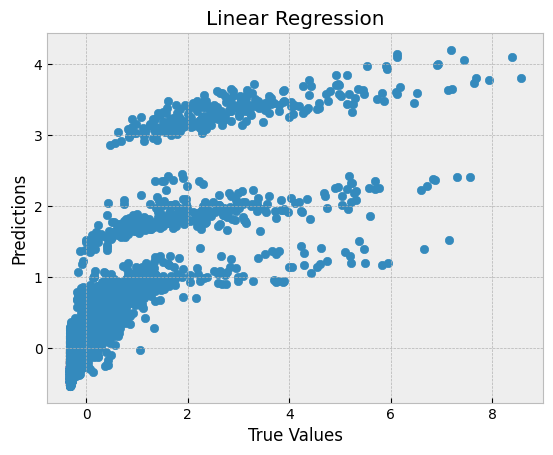

In [110]:
plt.scatter(y_test, lr_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.show()

In [111]:
# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions).round(2)
lr_rmse = np.sqrt(lr_mse).round(2)

In [112]:
# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_test)
lr_predictions_abs = abs(lr_predictions)

In [113]:
# Print the evaluation results for Linear Regression model
print("\nEvaluation Results for Linear Regression:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)


Evaluation Results for Linear Regression:
MSE: 0.21
RMSE: 0.46


# XGBoost Model

In [114]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)

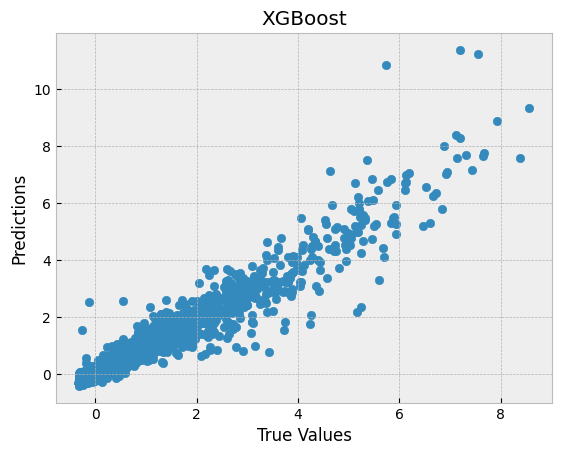

In [115]:
plt.scatter(y_test, xgb_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("XGBoost")
plt.show()

In [116]:
# Evaluation Metrics for XGBoost
xgb_mse = mean_squared_error(y_test, xgb_predictions).round(2)
xgb_rmse = np.sqrt(xgb_mse).round(2)

In [117]:
# Print the evaluation results for XGBoost model
print("\nEvaluation Results for XGBoost:")
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)


Evaluation Results for XGBoost:
MSE: 0.04
RMSE: 0.2


## Random Forest Regression 

In [118]:
%%time

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make prediction on X_test
rf_predictions = rf.predict(X_test)

CPU times: total: 5min 7s
Wall time: 11min 8s


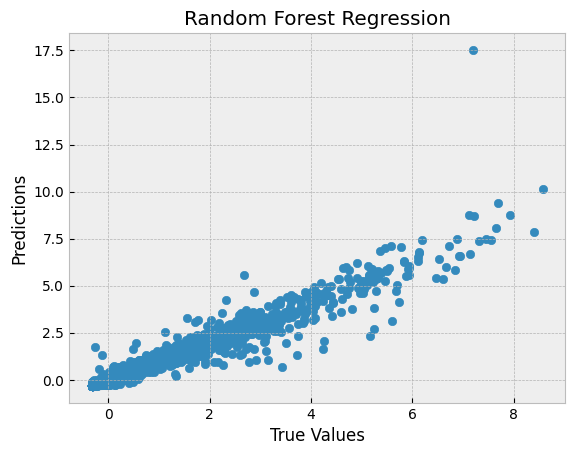

In [119]:
plt.scatter(y_test, rf_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regression")
plt.show()

In [120]:
# Evaluation Metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_predictions).round(2)
rf_rmse = np.sqrt(rf_mse).round(2)
#rf_rmsle = np.sqrt(mean_squared_error(np.log(y_test), np.log(rf_predictions)))

In [121]:
# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
rf_predictions_abs = abs(rf_predictions)

In [122]:
# Print the evaluation results for Random Forest Regrression model
print("\nEvaluation Results for Random Forest:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)


Evaluation Results for Random Forest:
MSE: 0.04
RMSE: 0.2


In [123]:
# Create a table to compare the evaluation results
results_table = pd.DataFrame({'Model': ['Linear Regression','XGBoost', 'Random Forest'],
                              'MSE': [lr_mse, xgb_mse, rf_mse],
                              'RMSE': [lr_rmse, xgb_rmse, rf_rmse]})

# Print the comparison table
print("\nComparison Table of Evaluation Results:")
print(results_table)


Comparison Table of Evaluation Results:
               Model   MSE  RMSE
0  Linear Regression  0.21  0.46
1            XGBoost  0.04  0.20
2      Random Forest  0.04  0.20


# Arima

In [124]:
# Define the ARIMA model
# The order represents the autoregressive (AR), differencing (I), and moving average (MA) components of the model.
# (p,d,q) 2most recent observation, 0no differencing applied to time series, 0 No moving average comp is included in the model
model_ar = ARIMA(y_train, order=(2, 0, 0)) 

# Fit the ARIMA model
model_ar = model_ar.fit()

# Make predictions
predictions_ar = model_ar.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Calculate the mean squared error
mse_ar = mean_squared_error(y_test, predictions_ar)
rmse_ar = np.sqrt(mse_ar)

# Print the MSE and RMSE
print("Mean Squared Error (MSE):", mse_ar)
print("Root Mean Squared Error (RMSE):", rmse_ar)


Mean Squared Error (MSE): 0.7761309744458438
Root Mean Squared Error (RMSE): 0.8809829592255708


## Prophet Model

In [125]:
# Set the holiday to correct format for prophet model
train_holiday = df.rename(columns = {'date':'ds', 'sales': 'y'})
train_holiday

ds  store_nbr         y  onpromotion  year  transactions  \
0      2013-01-01         25 -0.325920            0  2013     -0.917916   
1      2013-01-01         25 -0.325920            0  2013     -0.917916   
2      2013-01-01         25 -0.324316            0  2013     -0.917916   
3      2013-01-01         25  0.323701            0  2013     -0.917916   
4      2013-01-01         25 -0.325920            0  2013     -0.917916   
...           ...        ...       ...          ...   ...           ...   
322042 2017-08-15         52 -0.007253            0  2017      0.495921   
322043 2017-08-15         52 -0.242177            0  2017      0.495921   
322044 2017-08-15         52  2.724389            8  2017      0.495921   
322045 2017-08-15         52 -0.312286            0  2017      0.495921   
322046 2017-08-15         52 -0.320306            0  2017      0.495921   

        dcoilwtico  cluster  month  dayofmonth  ...  city_Quevedo  city_Quito  \
0        -2.046292        1      1           1  ...           0.0         0.0   
1        -2.046292        1      1           1  ...           0.0         0.0   
2        -2.046292        1      1           1  ...           0.0         0.0   
3        -2.046292        1      1           1  ...           0.0         0.0   
4        -2.046292        1      1           1  ...           0.0         0.0   
...            ...      ...    ...         ...  ...           ...         ...   
322042   -0.415547       11      8          15  ...           0.0         0.0   
322043   -0.415547       11      8          15  ...           0.0         0.0   
322044   -0.415547       11      8          15  ...           0.0         0.0   
322045   -0.415547       11      8          15  ...           0.0         0.0   
322046   -0.415547       11      8          15  ...           0.0         0.0   

        city_Riobamba  city_Salinas  city_Santo Domingo  \
0                 0.0           1.0                 0.0   
1                 0.0           1.0                 0.0   
2                 0.0           1.0                 0.0   
3                 0.0           1.0                 0.0   
4                 0.0           1.0                 0.0   
...               ...           ...                 ...   
322042            0.0           0.0                 0.0   
322043            0.0           0.0                 0.0   
322044            0.0           0.0                 0.0   
322045            0.0           0.0                 0.0   
322046            0.0           0.0                 0.0   

        holiday_type_Additional  holiday_type_Bridge  holiday_type_Event  \
0                           0.0                  0.0                 0.0   
1                           0.0                  0.0                 0.0   
2                           0.0                  0.0                 0.0   
3                           0.0                  0.0                 0.0   
4                           0.0                  0.0                 0.0   
...                         ...                  ...                 ...   
322042                      0.0                  0.0                 0.0   
322043                      0.0                  0.0                 0.0   
322044                      0.0                  0.0                 0.0   
322045                      0.0                  0.0                 0.0   
322046                      0.0                  0.0                 0.0   

        holiday_type_Holiday  holiday_type_Transfer  
0                        1.0                    0.0  
1                        1.0                    0.0  
2                        1.0                    0.0  
3                        1.0                    0.0  
4                        1.0                    0.0  
...                      ...                    ...  
322042                   1.0                    0.0  
322043                   1.0                    0.0  
322044                   1.0     

In [126]:
# Extract event or holiday from holidays, filter either event or holiday
event_holiday = holidays[(holidays['type'] == 'Event') | (holidays['type'] == 'Holiday')]
event_holiday

date     type    locale locale_name                    description  \
0   2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1   2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2   2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3   2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4   2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   
..         ...      ...       ...         ...                            ...   
338 2017-11-12  Holiday     Local      Ambato        Independencia de Ambato   
340 2017-12-06  Holiday     Local       Quito             Fundacion de Quito   
341 2017-12-08  Holiday     Local        Loja              Fundacion de Loja   
344 2017-12-22  Holiday     Local     Salinas       Cantonizacion de Salinas   
348 2017-12-25  Holiday  National     Ecuador                        Navidad   

     transferred  
0          False  
1          False  
2          False  
3          False  
4          False  
..           ...  
338        False  
340         True  
341        False  
344        False  
348        False  

[277 rows x 6 columns]

In [127]:
# rename to ds and holiday as required
event_holiday = event_holiday[['date', 'type']].rename(columns = {'date': 'ds', 'type': 'holiday'})
event_holiday

ds  holiday
0   2012-03-02  Holiday
1   2012-04-01  Holiday
2   2012-04-12  Holiday
3   2012-04-14  Holiday
4   2012-04-21  Holiday
..         ...      ...
338 2017-11-12  Holiday
340 2017-12-06  Holiday
341 2017-12-08  Holiday
344 2017-12-22  Holiday
348 2017-12-25  Holiday

[277 rows x 2 columns]

In [128]:
# Make prophet model with the specified holiday information 
m = Prophet(holidays = event_holiday)

In [129]:
# fits the model using the aggregated sales data from the train_holiday DataFrame.
m.fit(train_holiday[['ds', 'y']].groupby('ds').sum().reset_index())

14:16:52 - cmdstanpy - INFO - Chain [1] start processing
14:16:52 - cmdstanpy - INFO - Chain [1] done processing


In [130]:
# Make future date
future = m.make_future_dataframe(periods=365)
future.tail()

ds
539 2018-08-11
540 2018-08-12
541 2018-08-13
542 2018-08-14
543 2018-08-15

In [131]:
# The forecast DataFrame contains the 'ds' representing the future dates, 
# 'yhat' representing the predicted values, 'yhat_lower' representing the lower bound of the prediction interval, 
# and 'yhat_upper' representing the upper bound of the prediction interval.

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
539 2018-08-11  332.391977  174.350279  479.903566
540 2018-08-12  336.513248  167.699151  496.577158
541 2018-08-13  222.509774   65.544301  384.739280
542 2018-08-14  169.483461   23.404693  332.424486
543 2018-08-15  141.919964   -4.008672  299.798786

# Interpret part of the data (last five tails)

- On August 11, 2018 (ds), the model predicts a value of 332.391977 for the sales (yhat). This means that the forecasted value for that date is expected to be around 332.39.


- The lower bound (yhat_lower) for August 11, 2018, is 177.567129, indicating that with an 80% confidence level, the actual value is not expected to be lower than 177.57.


- The upper bound (yhat_upper) for August 11, 2018, is 497.760060, indicating that with an 80% confidence level, the actual value is not expected to exceed 497.76.


- Similarly, the same interpretation applies to the following dates:


- On August 12, 2018, the forecasted value (yhat) is 336.513248, with a lower bound (yhat_lower) of 177.916011 and an upper bound (yhat_upper) of 499.019265.


- On August 13, 2018, the forecasted value (yhat) is 222.509774, with a lower bound (yhat_lower) of 67.479217 and an upper bound (yhat_upper) of 373.828088.


- On August 14, 2018, the forecasted value (yhat) is 169.483461, with a lower bound (yhat_lower) of 15.557210 and an upper bound (yhat_upper) of 315.410878.


- On August 15, 2018, the forecasted value (yhat) is 141.919964, with a lower bound (yhat_lower) of -5.822971 and an upper bound (yhat_upper) of 287.608924.


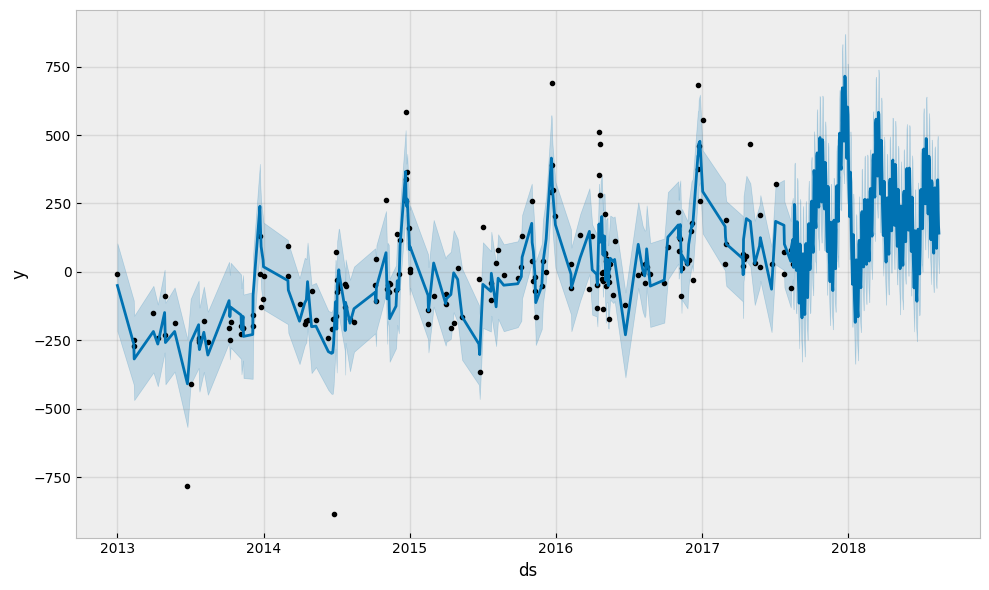

In [132]:
fig1 = m.plot(forecast)

- Visualizes the forecasted values along with the historical data. This plot provide insights into the predicted trends and patterns in the data. 


- Historical Data:
    The scatter points indicate the historical data. These are the actual observed values of your target variable (sales) over time.


- Trend Line:
    Blue line, representing the estimated trend in the data. This line captures the overall direction or pattern in your time series.


- Forecasted Values:
    Following the historical data and the trend line, the black line show the forecasted valuesthe  target variable for the future time periods.


- Uncertainty Interval:
    The plot also includes a shaded region around the forecasted values. This shaded region represents the uncertainty or prediction interval. By default, it corresponds to a 80% confidence interval, indicating where the actual values are likely to fall. The shaded region will have a wider span in regions where the uncertainty is higher.

# Evaluation results on Classical ML Models

- Based on the comparison of evaluation results, both the Random Forest model and XGBoost outperform the Linear Regression model. 



- They exhibit lower values for MSE and RMSE , indicating smaller errors and closer predictions to the actual store sales. 



- This suggests that the Random Forest model and XGBoost are more accurate and reliable in capturing the underlying patterns and dynamics of the time series data, resulting in improved forecasting performance compared to the Linear Regression model.



- Each of them has their own pros and cons, but considering random forest we can capture important features as well

# Arima and Prophet Model

- In the second approac I used specific time series model,Arima, it works better with time series that have strong seasonal effects



- According to the results of Arima, I got less acucurate score in MSE, RMSE even less than the classical ML model. therefore I didnt consider for further analysis.

# Prohet

- In the prophet Model, the  "Holiday" feature is used to capture the impact of holidays or significant events on the time series data. It helps Prophet to model and account for the seasonal effects that holidays may have on the target variable.

- To analyze and understand how the "Holiday" feature affects the predicted trends and patterns in the target variable (sales), I perform the following steps:


1. Include the "Holiday" feature in the Prophet model by providing a list of holidays and their dates.


2. Fit the Prophet model using the historical data, including the "Holiday" feature.


3. Generate forecasts for the future time periods using the trained Prophet model.


4. Visualize the forecasted values along with the historical data, trend line, and uncertainty interval. This plot will help you analyze how the presence of holidays impacts the predicted trends and patterns in the sales data.


- By examining the forecasted values during holiday periods compared to non-holiday periods, one can assess how well the "Holiday" feature captures the expected changes in the target variable. This analysis can provide insights into the influence of holidays on sales trends and patterns.

# Conclusion

- After analyzing the structure of the data and gaining insights into the trends and seasonality, we proceeded to create features and train basic models such as Linear Regression, Random Forest, and XGBoost. While these models provided initial forecasts, there is further room for improvement in terms of accuracy.


- By optimizing the hyperparameters, we can further refine the models' behavior and potentially capture more complex patterns and relationships within the time series data.


- Also for the Prophet model, we can look at  other features deeper